### LOGISTIC REGRESSION

#### 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [57]:
df = pd.read_csv('50_Startups.csv')
df.shape

(50, 5)

In [58]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [60]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [61]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

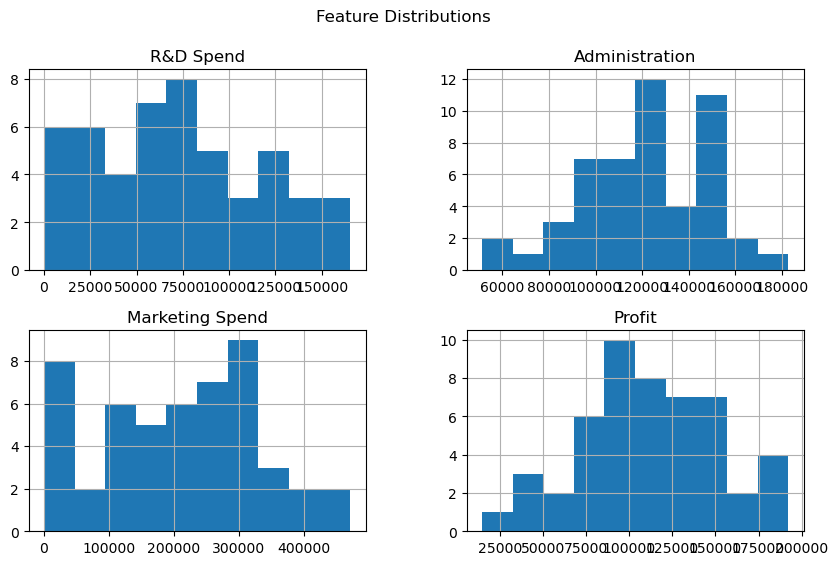

In [62]:
df.hist(figsize=(10,6))
plt.suptitle("Feature Distributions")
plt.show()

In [63]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

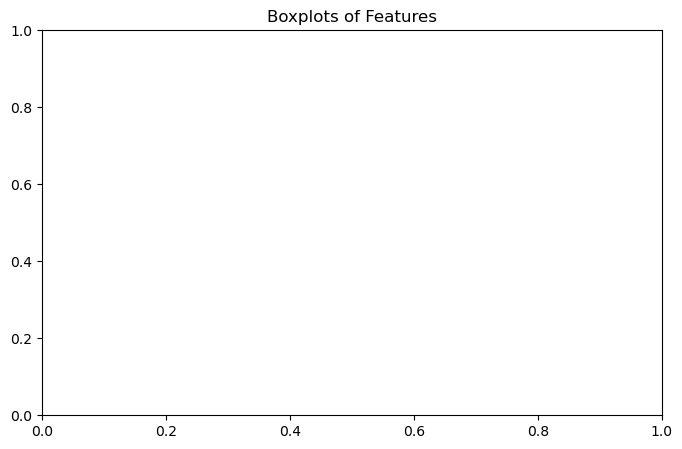

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(df=df.drop(columns='State'))
plt.title("Boxplots of Features")
plt.show()

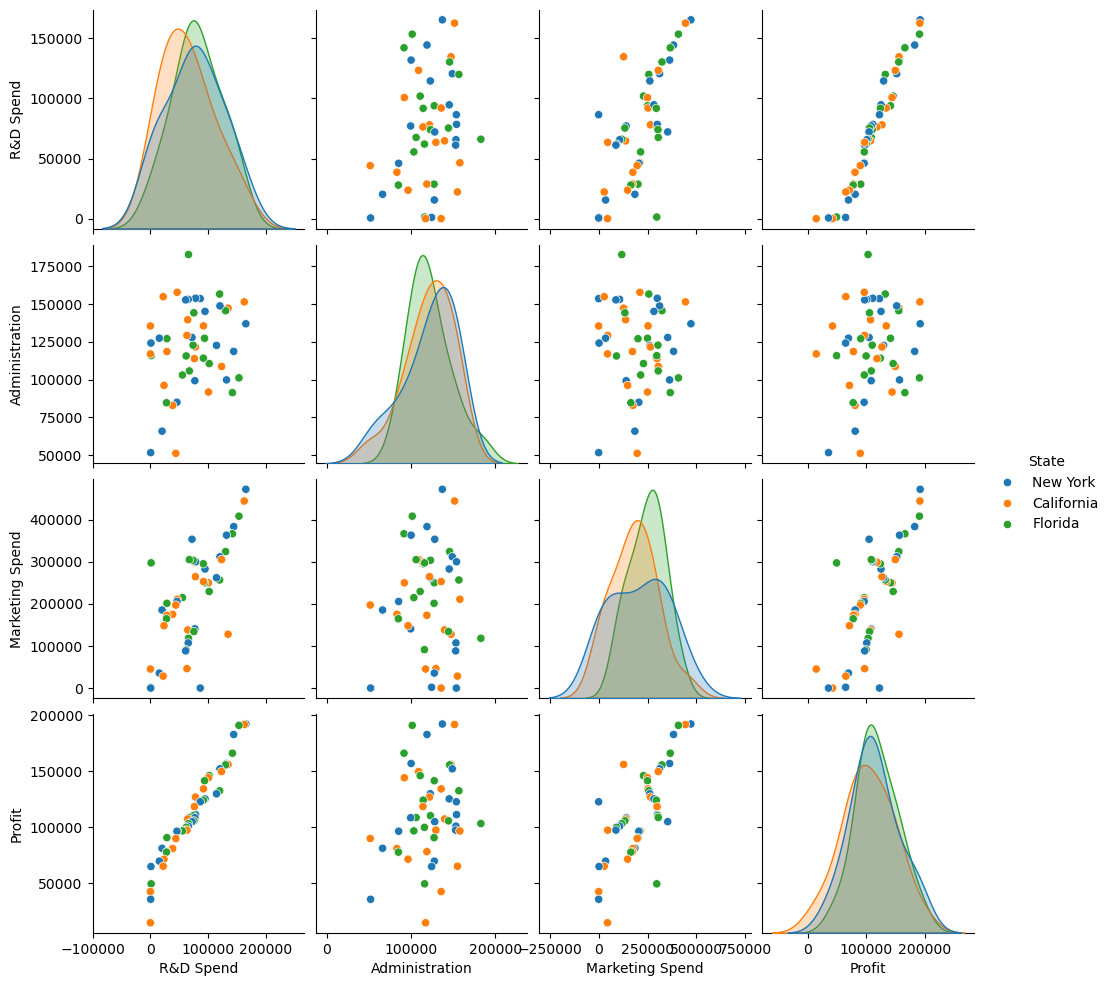

In [65]:
sns.pairplot(df, hue='State')
plt.show()

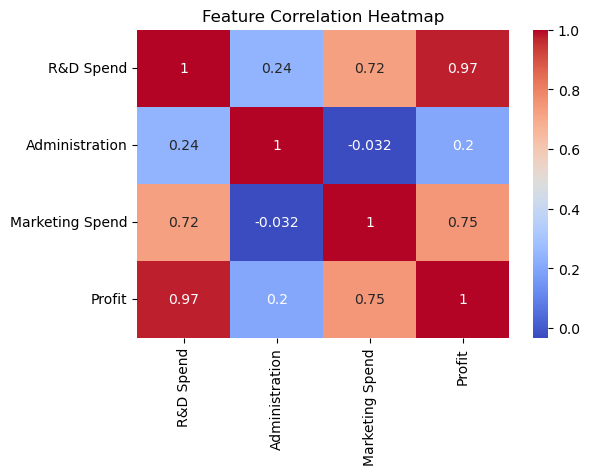

In [66]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop(columns='State').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


In [67]:
mean_profit = df['Profit'].mean()
df['HighProfit'] = (df['Profit'] >= mean_profit).astype(int)

In [68]:
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [69]:
X = df.drop('HighProfit', axis=1)
y = df['HighProfit']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 5), (15, 5), (35,), (15,))

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [72]:
log_reg = LogisticRegression()

In [73]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [74]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

#### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

b. Visualize the ROC curve.


In [75]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [76]:
precision_score(y_test, y_pred)

1.0

In [77]:
recall_score(y_test, y_pred)

0.7142857142857143

In [78]:
f1_score(y_test, y_pred)

0.8333333333333334

In [79]:
roc_auc_score(y_test, y_pred_proba)

0.8928571428571428

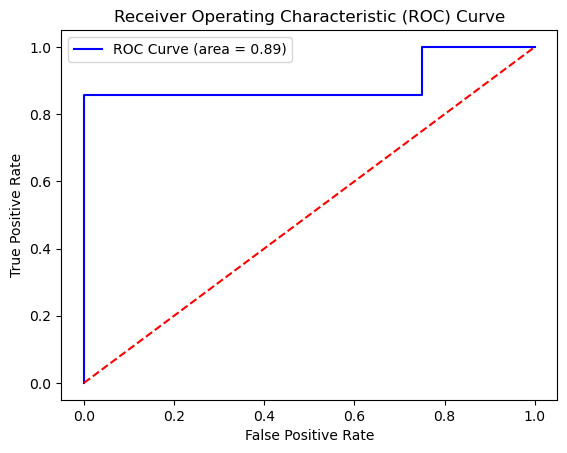

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### MULTIPLE LINEAR REGRESSION

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the Profit of startup company based on the given attributes.


#### Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [83]:
data = pd.read_csv("bank_data.csv")
data.shape

(45211, 32)

In [84]:
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [86]:
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
data.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

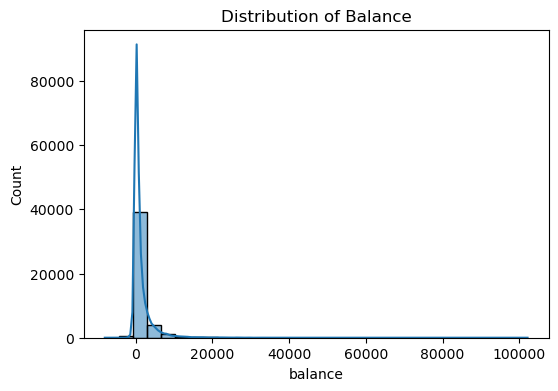

In [89]:
plt.figure(figsize=(6,4))
sns.histplot(data['balance'], kde=True, bins=30)
plt.title("Distribution of Balance")
plt.show()

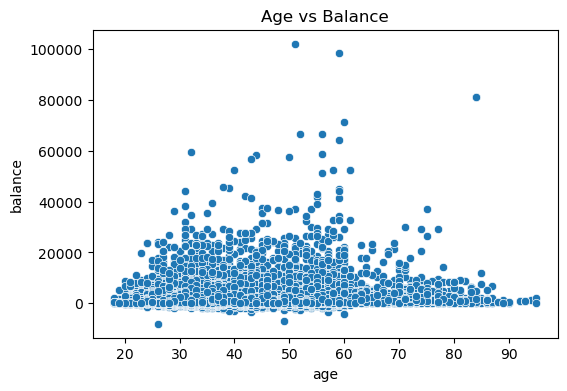

In [90]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='balance', data=data)
plt.title("Age vs Balance")
plt.show()

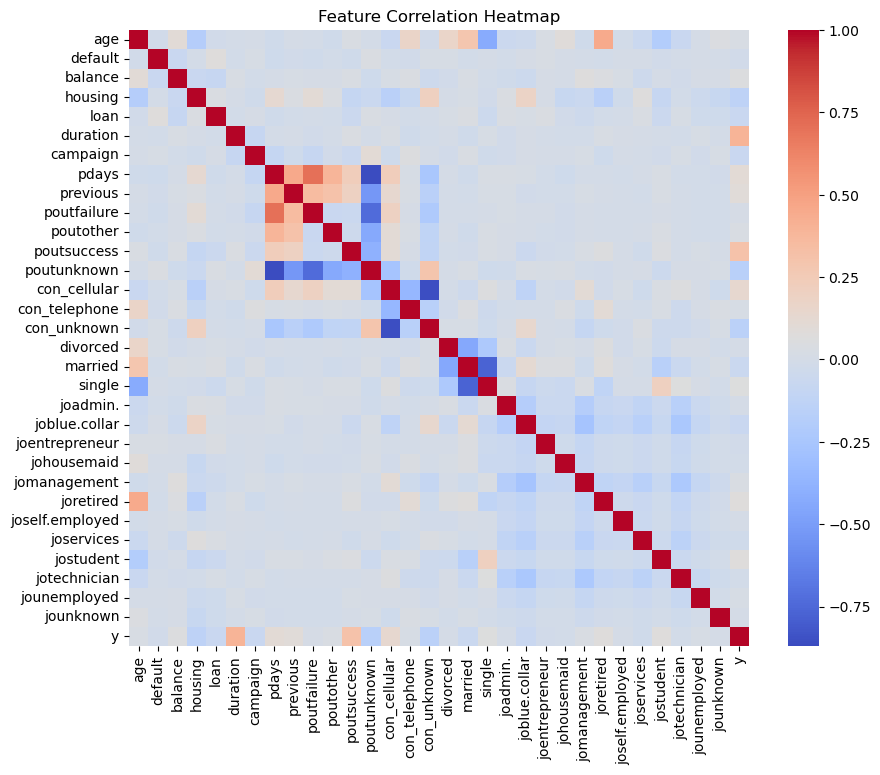

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [92]:
X = data.drop(['balance', 'y'], axis=1, errors='ignore')  
y = data['balance']

##### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 30), (9043, 30), (36168,), (9043,))

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [111]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
y_pred1 = model1.predict(X_test)

In [113]:
model1.intercept_

np.float64(769.7742732031586)

In [114]:
model1.coef_.shape

(30,)

In [115]:
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
X2 = data[selected_features]
y2 = data['balance']

In [116]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train, X2_test.shape, y2_train.shape, y2_test.shape

(       age  duration  campaign  pdays  previous
 3344    41        72         1     -1         0
 17965   49       269         2     -1         0
 18299   42       130         4     -1         0
 10221   37       375        11     -1         0
 32192   56       264         2     -1         0
 ...    ...       ...       ...    ...       ...
 11284   44      2093         1     -1         0
 44732   23       210         1     92         1
 38158   34       239         1     -1         0
 860     33       111         1     -1         0
 15795   38        68        10     -1         0
 
 [36168 rows x 5 columns],
 (9043, 5),
 (36168,),
 (9043,))

In [117]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

In [118]:
from sklearn.preprocessing import PolynomialFeatures


In [106]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X3_poly = poly.fit_transform(data[['age', 'duration']])
y3 = data['balance']

In [107]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_poly, y3, test_size=0.2, random_state=42)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((36168, 5), (9043, 5), (36168,), (9043,))

In [108]:
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

##### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [109]:
def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.3f}, RMSE = {rmse:.3f}")

In [110]:
evaluate(y_test, y_pred1, "Model 1 (All Features)")
evaluate(y2_test, y_pred2, "Model 2 (Top Predictors)")
evaluate(y3_test, y_pred3, "Model 3 (Polynomial)")

Model 1 (All Features): R² = 0.028, RMSE = 3085.226
Model 2 (Top Predictors): R² = 0.009, RMSE = 3116.642
Model 3 (Polynomial): R² = 0.009, RMSE = 3116.120
